In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)
pd.set_option("display.width", 500)
import warnings
warnings.simplefilter(action = "ignore")

In [ ]:
df = pd.read_csv("C:/Users/ADMIN/Incident Impact project/Excelr Project/perfectdata.csv")
df.drop(columns = "Unnamed: 0", inplace = True)

In [ ]:
df.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,type_contact,location,category_ID,user_symptom,impact,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify,created_date,created_time,updated_date,updated_time,opened_date,opened_time
0,INC0000045,New,True,0,0,0,2403,8,6,21,Phone,143,55,72,2,56,17,True,False,Do Not Notify,2016-02-29 00:00:00,1900-01-01 01:23:00,2016-02-29 00:00:00,1900-01-01 01:23:00,2016-02-29 00:00:00,1900-01-01 01:16:00
1,INC0000045,Resolved,True,0,0,3,2403,8,6,804,Phone,143,55,72,2,56,17,True,False,Do Not Notify,2016-02-29 00:00:00,1900-01-01 01:23:00,2016-02-29 00:00:00,1900-01-01 11:29:00,2016-02-29 00:00:00,1900-01-01 01:16:00
2,INC0000045,Closed,False,0,0,4,2403,8,6,908,Phone,143,55,72,2,56,17,True,False,Do Not Notify,2016-02-29 00:00:00,1900-01-01 01:23:00,2016-03-05 00:00:00,1900-01-01 12:00:00,2016-02-29 00:00:00,1900-01-01 01:16:00
3,INC0000047,Active,True,1,0,1,2403,397,171,21,Phone,165,40,471,2,24,31,True,False,Do Not Notify,2016-02-29 00:00:00,1900-01-01 04:57:00,2016-02-29 00:00:00,1900-01-01 05:30:00,2016-02-29 00:00:00,1900-01-01 04:40:00
4,INC0000047,Active,True,1,0,2,2403,397,171,21,Phone,165,40,471,2,24,31,True,False,Do Not Notify,2016-02-29 00:00:00,1900-01-01 04:57:00,2016-02-29 00:00:00,1900-01-01 05:33:00,2016-02-29 00:00:00,1900-01-01 04:40:00


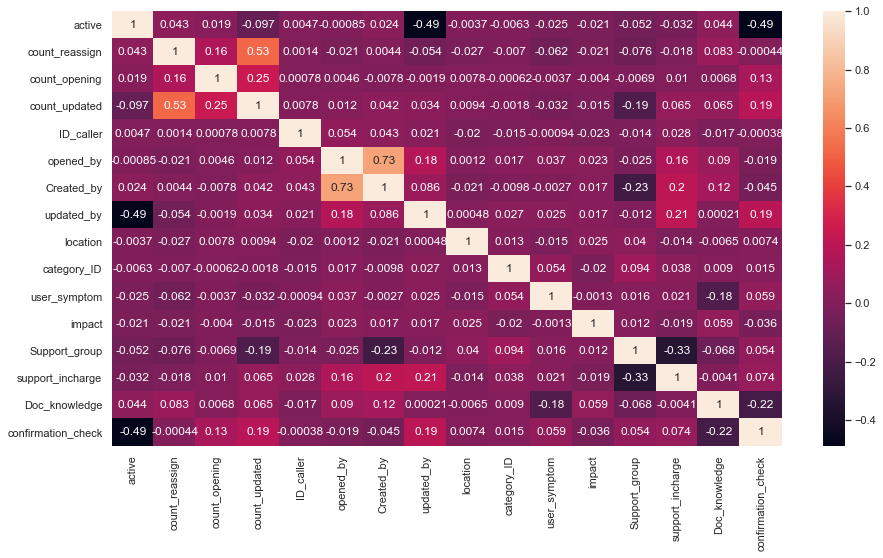

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.set(font_scale = 1)
sns.heatmap(df.corr(), annot = True)


From this we see that, their is no attribute having a correlation between the dependent variable impact.

And also multicollineariy problem is occured between "opened by" and "created by" (0.73)

and then "count reassign" and "count updated" having slight correlation (0.53)

and then "confirmation check" and "active" is negatively correlated (-0.49) and also same cases happened b/n "updated_by" and "active"

Others are extremely not correlated.

### Distplot for finding normalization:
#### here's other than "count: reassingn,open,updated" all are must be considered as a nominal or ordinal catagories except datetime column

In [ ]:
def dist(df,var1):
    plt.figure()
    sns.distplot(df[var1], kde = False, bins = 30)
    plt.show()

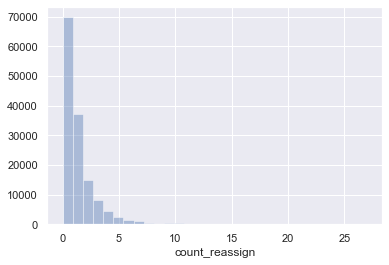

In [ ]:
dist(df, "count_reassign")

Half of the observations have '0' in count reassign

and also more than 75% of the observations are 0 and one time reassigned


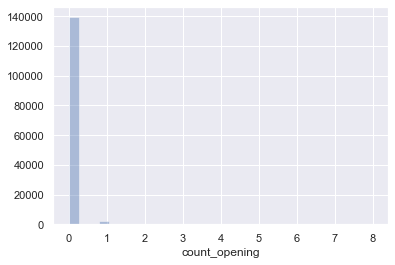

0    139398
1      1918
2       190
3       107
4        48
5        24
6        18
7         5
8         4
Name: count_opening, dtype: int64
0.9836711075985096


In [ ]:
dist(df, "count_opening")
open_val_count = df['count_opening'].value_counts()
print(open_val_count)
print(open_val_count[0]/len(df))

arount 98 % of the complaints are resolved at a first time and not rejected by the customers.  Its look good to see!!!

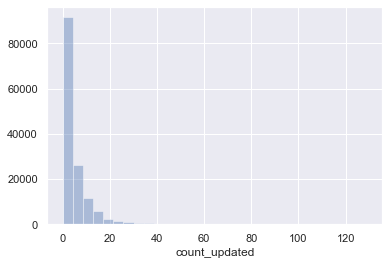

0     24913
1     22062
2     19749
3     14168
4     10735
5      8550
6      7014
7      5758
8      4678
9      3846
10     3115
11     2502
12     2075
13     1647
14     1359
15     1129
16      937
17      799
18      672
19      608
Name: count_updated, dtype: int64
Most updated count : 129
0.8571821722931015


In [ ]:
dist(df, "count_updated")
updated_val_count = df['count_updated'].value_counts()
print(updated_val_count[0:20])
print("Most updated count :", updated_val_count.index.max())
print(updated_val_count[0:10].sum()/len(df))

Around 85% of the observations are updated their system services within a 20 counts

And It also shows that most updated count is 129 for a single complaint

In [ ]:
df[df['count_updated'] == 129]

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,Created_by,updated_by,type_contact,location,category_ID,user_symptom,impact,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify,created_date,created_time,updated_date,updated_time,opened_date,opened_time
100826,INC0001349,Closed,False,2,0,129,1293,381,10,908,Phone,204,45,291,3,67,223,True,True,Do Not Notify,2016-03-17 00:00:00,1900-01-01 17:56:00,2017-02-04 00:00:00,1900-01-01 19:00:00,2016-03-02 00:00:00,1900-01-01 14:13:00


Even though the impact is low, it take more than 11 months for final update. 

May be the human error

In [ ]:
df["ID_caller"].value_counts()

1904    1454
290      791
4514     716
1441     322
298      293
        ... 
731        2
1053       2
4247       2
1626       2
826        2
Name: ID_caller, Length: 5244, dtype: int64

Most call from the caller id is 1904.

In [ ]:
df[df['ID_caller'] == 1904]['location'].value_counts()

188    810
125    626
161     11
71       7
Name: location, dtype: int64

Its all from the location 161, 188, 125 and 71